## Capitulo X.1: Teoría de inventarios (Modelos determinísticos)

### Caso X.1: Fabrica de televisores (Modelo deterministico de revisión continua)

Una compañía que fabrica televisores produce sus propias bocinas para utilizarlas en la fabricación de estos aparatos. Los televisores se ensamblan en una línea de producción continua a una tasa de 8000 por mes, y se necesita una bocina por televisor. Las bocinas se fabrican por lotes, pues no justifican toda una línea de producción y se pueden producir cantidades relativamente grandes en un tiempo corto. Por lo tanto, estas bocinas se colocan en inventario hasta que se necesiten para ser ensambladas en los televisores. La compañía está interesada en determinar cuándo producir un lote de bocinas y cuantas producir en cada lote. Es necesario tomar en cuenta varios costos:

1. Cada vez que se produce un lote, se incurre en un **costo de preparación** de 12000 dólares. Esta actividad incluye el "costo de preparar las máquinas y herramientas", los costos administrativos, los registros, etc. Observe que la existencia de estos costos es un argumento para producir lotes grandes de bocinas.
2. El **costo unitario de producción** de una sola bocina (excluye el costo de preparación) es de 10 dólares independientemente del tamaño del lote fabricado. (No obstante, en general, el costo unitario de producción no necesita ser constante y puede decrecer junto con el tamaño del lote.)
3. La producción de bocinas en grandes lotes conduce a la formación de un inventario grande. La estimación del **costo de mantener** una bocina en almacén es de 0.30 dólares por mes. Este monto incluye el costo de capital comprometido en el inventario. Como el dinero invertido en él no se puede usar de otra manera productiva, este costo de capital consiste en el rendimiento perdido (llamado costo de oportunidad) porque debe prescindirse de usarlo de otra forma. Otros componentes del costo de mantener inventarios incluyen el costo de renta de espacio de almacén, los seguros de incendio, robo o vandalismo, impuestos basados en el valor del inventario y el costo de personal que supervisa y protege el inventario.
4. La política de la compañía prohíbe la planeación deliberada de faltantes de cualquiera de sus componentes. Sin embargo, en ocasiones faltan bocinas y se estima que cada una de ellas que falta cuando se necesita cuesta 1.10 dólares por mes. Este **costo por faltantes** incluye el costo de instalar las bocinas con el televisor totalmente ensamblado, el interés perdido por el retraso en recibir ingresos por ventas, el costo de mantener registros y otros.

Fuente: Hillier, F. S. (2010)

### Modelo determinístico de revisión continua

#### Modelo EOQ:

**1. Supuestos del modelo:**

   * Los artículos o bienes en consideración se sacarán en forma continua a una tasa constante **conocida** por d (demanda = unidades/tiempo).
   * Es un proceso de revisión continua, por lo que el inventario se reabastece (al producir u ordenar) un lote de tamaño fijo (Q unidades), donde las Q unidades llegan juntas en el tiempo deseado (cuando el nivel baje lo suficiente).
   * Los únicos costos que se consideran son:
       * K = costo de preparación para ordenar un lote.
       * c = costo de producir o comprar cada unidad.
       * h = costo de mantener el inventario por unidad, por unidad de tiempo.
   * Primero se supondrá que no se admiten faltantes (pero después se relajará este supuesto).

**2. Objetivo del modelo:**

   Determinar con qué frecuencia y en qué cantidad se debe reabastecer el inventario de manera que se minimice la suma de los costos por unidad de tiempo.

#### Modelo EOQ básico:

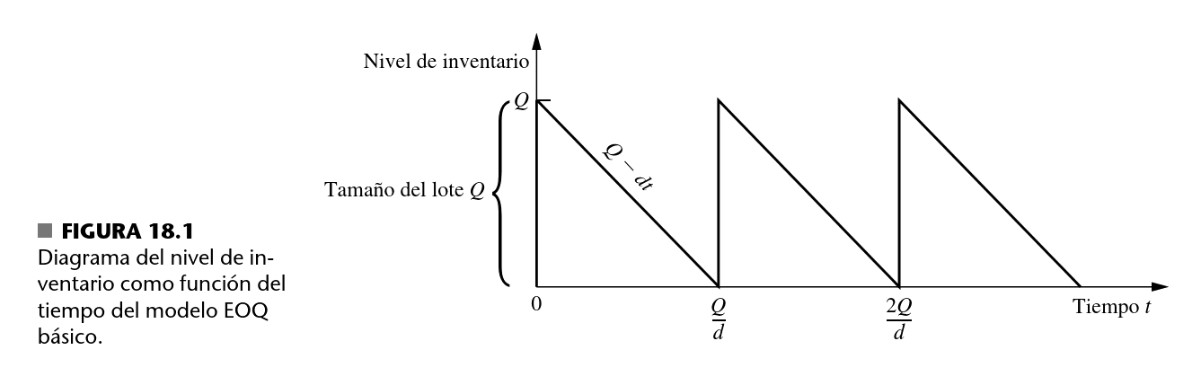

**1. Supuestos:**
   * Se conoce la demanda en d unidades por unidad de tiempo y se supone constante.
   * Se conoce el tiempo de entrega y es constante.
   * La cantidad ordenada (Q) para reabastecer el inventario llega de una sola vez cuando se desea, es decir, cuando el nivel de inventario baja hasta 0.
   * No se permiten faltantes.

**2. Conceptos:**
   * El tiempo entre colocar una orden y recibirla se conoce como **tiempo de entrega**.
   * El nivel de inventario cuando se coloca la orden se llama **punto de reorden (= tasa de demanda x tiempo de entrega)**.
   * El tiempo entre reabastecimientos consecutivos del inventario se conoce como **ciclo**.

#### Desarrollo Modelo EOQ básico:

En el ejemplo de las bocinas, un ciclo puede interpretarse como el tiempo que pasa entre las corridas de producción. Si se producen 24000 bocinas en cada corrida y después se usan a una tasa de 8000 por mes, la longitud del ciclo es:

In [1]:
import numpy as np

In [2]:
Q = 24000 # Tamaño del lote
d = 8000 # Tasa de consumo mensual
ciclo = Q/d # ciclo
print("La longitud del ciclo es de: " + str(ciclo) + " meses.")

La longitud del ciclo es de: 3.0 meses.


El costo total por unidad de tiempo T se obtiene a partir de los siguientes componentes:

1. Costo de producir u ordenar por ciclo:

In [3]:
K = 12000 # Costo de preparación para ordenar un lote
c = 10 # Costo de producir o comprar cada unidad
Cp = K + c*Q # Costo de producir u ordenar por ciclo
print("El costo de producir por ciclo es de: " + str(Cp) + " dólares.")

El costo de producir por ciclo es de: 252000 dólares.


2. Costo de mantener inventario por ciclo:

In [4]:
h = 0.30 # Costo de mantener inventario por unidad, por unidad de tiempo
Ch = (h*(Q**2))/(2*d)
print("El costo de mantener inventario por ciclo es de: " + str(Ch) + " dólares.")

El costo de mantener inventario por ciclo es de: 10800.0 dólares.


Por lo tanto, el costo total por ciclo es:

In [5]:
CT = Cp + Ch
print("El costo total por ciclo es de: " + str(CT) + " dólares (cada 3 meses).")

El costo total por ciclo es de: 262800.0 dólares (cada 3 meses).


Por lo que el costo total por unidad de tiempo es:

In [6]:
CT_t = CT/ciclo
print("El costo total por mes es de: " + str(CT_t) + " dólares por mes.")

El costo total por mes es de: 87600.0 dólares por mes.


El valor de Q que minimiza CT_t (EOQ) es el siguiente:

In [7]:
EOQ = round(np.sqrt((2*d*K)/h),2)
print("El valor de Q que minimiza CT_t (EOQ) es el siguiente: " + str(EOQ) + " unidades.")

El valor de Q que minimiza CT_t (EOQ) es el siguiente: 25298.22 unidades.


Y el tiempo de ciclo correspondiente, sea t_EOQ, es:

In [8]:
t_EOQ = round(EOQ/d,2)
print("El tiempo de ciclo correspondiente a la cantidad que minimiza el valor el costo total por mes es: " + str(t_EOQ) + " meses.")

El tiempo de ciclo correspondiente a la cantidad que minimiza el valor el costo total por mes es: 3.16 meses.


Resulta interesante notar que EOQ y t_EOQ cambian de manera que son aceptables intuitivamente cuando se hace un cambio en K, h o d. Cuando el costo fijo K crece, tanto EOQ como t_EOQ crecen (menos preparaciones). Si el costo unitario de mantener h aumenta, tanto EOQ como t_EOQ disminuyen (niveles de inventario menores). A medida que la tasa de demanda d crece, EOQ también lo hace (lotes más grandes), pero t_EOQ disminuye (preparaciones más frecuentes).

En consecuencia, la solución óptima resultó en hacer una preparación de la línea de producción de bocinas cada 3.16 (~3.2) meses y producir 25.298 bocinas a la vez.

#### Modelo EOQ con faltantes planeados

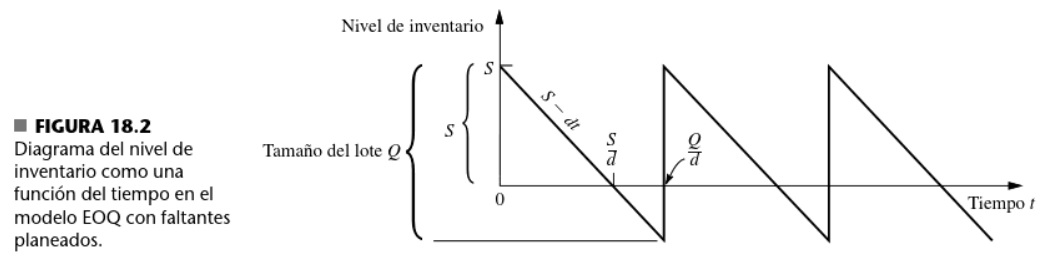

**1. Supuestos:**
   * Se conoce la demanda en d unidades por unidad de tiempo y se supone constante.
   * Se conoce el tiempo de entrega y es constante.
   * La cantidad ordenada (Q) para reabastecer el inventario llega de una sola vez cuando se desea, es decir, cuando el nivel de inventario baja hasta 0.
   * Se permiten faltantes planeados.

**2. Conceptos:**
   * El tiempo entre colocar una orden y recibirla se conoce como **tiempo de entrega**.
   * El nivel de inventario cuando se coloca la orden se llama **punto de reorden (= tasa de demanda x tiempo de entrega)**.
   * El tiempo entre reabastecimientos consecutivos del inventario se conoce como **ciclo**.
   * Las faltantes también se llaman **órdenes pendientes**. Cuando ocurren faltantes, los clientes afectados esperan que el producto esté nuevamente disponible. Sus órdenes pendientes se satisfacen en inmediato cuando llega la cantidad ordenada para reabastecer el inventario.

**3. Parámetros adicionales:**

   * p = costo de faltantes por unidad que falta por undad de tiempo que falta,
   * S = nivel de inventario justo después de recibir un lote de Q unidades,
   * Q - S = faltante en inventario justo antes de recibir un lote de Q unidades **(faltante máximo)**.

#### Desarrollo del EOQ con faltantes planeados

Siguiendo con el ejemplo de las bocinas, se tiene que tener en cuenta lo siguiente:

1. Al incluir S como un parámetro del modelo, el modelo se ha hecho un poco más complejo y se ha obtenido:

In [10]:
p = 1.1
S = round(np.sqrt((2*d*K)/h)*np.sqrt(p/(p+h)),2)
print("El nivel de inventario justo después de recibir un lote de EOQ unidades es: " + str(S) + " unidades.")

El nivel de inventario justo después de recibir un lote de EOQ unidades es: 22424.48 unidades.


2. Adicionalmente, la cantidad económica de pedido con faltantes planeados (EOQ_f) es:

In [12]:
EOQ_f = round(np.sqrt((2*d*K)/h)*np.sqrt((p+h)/p),2)
print("La cantidad económica de pedido con faltantes planeados es: " + str(EOQ_f) + " unidades.")

La cantidad económica de pedido con faltantes planeados es: 28540.24 unidades.


3. También es posible encontrar el faltante máximo de unidades:

In [15]:
f_max = round(EOQ_f - S,2)
print("El número faltante máximo de unidades es: " + str(f_max))

El número faltante máximo de unidades es: 6115.76


4. Posteriormente se determina la longitud óptima del ciclo:

In [17]:
ciclo_Q = round(EOQ_f/d,2)
print("El ciclo óptimo tiene una duración de: " + str(ciclo_Q) + " meses.")

El ciclo óptimo tiene una duración de: 3.57 meses.


5. También se puede estimar la fracción de tiempo en que no existen faltantes:

In [21]:
ciclo_S = round(S/d,2)
print("El ciclo del nivel de inventario S es: " + str(ciclo_S) + " meses.")
print("La fracción de tiempo en que no existen faltantes: " + str(round(ciclo_S/ciclo_Q,2)))

El ciclo del nivel de inventario S es: 2.8 meses.
La fracción de tiempo en que no existen faltantes: 0.78


Lo anterior implica que la línea de producción de bocinas debe prepararse cada 3.6 meses para producir 28540 unidades. El faltante máximo que se permite es de 6116 bocinas. Note que EOQ_f y ciclo_Q no difieren mucho de los valores del caso en que no se permiten faltantes. La razón es que p es mucho mayor que h.

#### Referencias

* Hillier, F. S. (2010). Introducción a la investigación de operaciones (9a. ed.). Retrieved from https://ebookcentral.proquest.com (pp. 772 - 791)